# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone or not someone has heart disease on their medical attributes 

Xe're going to take the following approach : 

1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition

in a statement,
> Given Clinical parameters about a patient, can we predict whether or not they have heart disease ?

## 2. Data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
 this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.


## Preparing the tools

We're going to use pandas, Matplotlib and numpy for data analysis and manipulation

In [2]:
import warnings
 # Suppress all warnings
warnings.filterwarnings("ignore")
 # Your code goes here
# ...
 # Reset warnings filter to default (optional)
#warnings.filterwarnings("default")

In [67]:
# Import all the tools we need 

# Regular EDA( exploratory data analysis) and plotting libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# We want our plots to appear inside the notebook 
%matplotlib inline 

# Models from Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape  # Rows, columns


(303, 14)

## Load data



## Data Exploration ( exploratory data analysis )

The goal here is to find out more about the data and become a subject matter export on the 

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how do you care aboout them?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features from the data 


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Let's find out how many of each class there

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

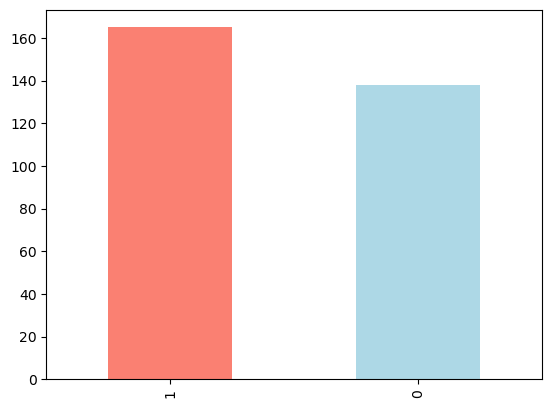

In [8]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values 

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex 



In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


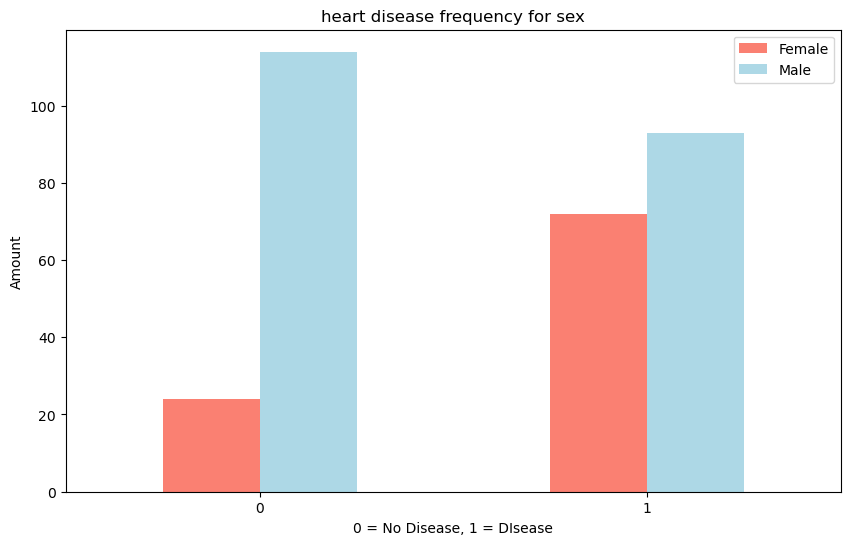

In [14]:
# Create a olot of crosstab

pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    figsize = (10,6),
                                    color =['salmon','lightblue']);
plt.title('heart disease frequency for sex')
plt.xlabel("0 = No Disease, 1 = DIsease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 1);

# Age vs Max heart rate for heart disease

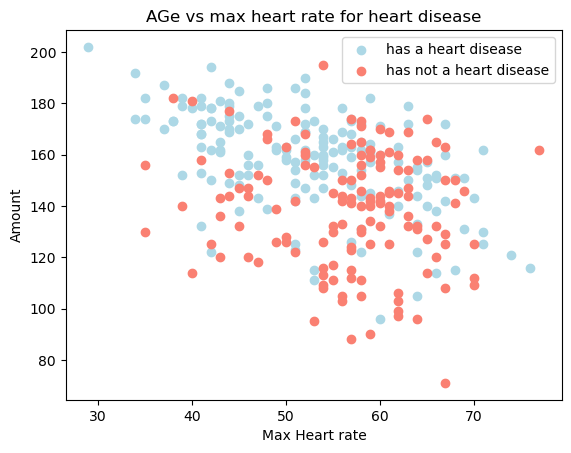

In [15]:
# Create another figure 

plt.Figure(figsize=(10,6))

# Scatter with positive examples 

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = 'lightblue');

# Scatter with negative examples 

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = 'salmon');
plt.title("AGe vs max heart rate for heart disease")
plt.legend(['has a heart disease','has not a heart disease'])
#plt.Figure(figsize=(10,6));
plt.ylabel('Amount')
plt.xlabel('Max Heart rate');

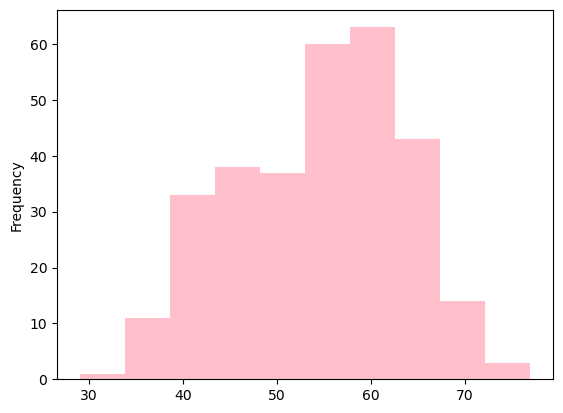

In [16]:
# Check the distribution of the age column woth histogram

df.age.plot.hist(color='pink');

### Herat Disease Frequency per chest pain type

cp - chest pain type 

    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


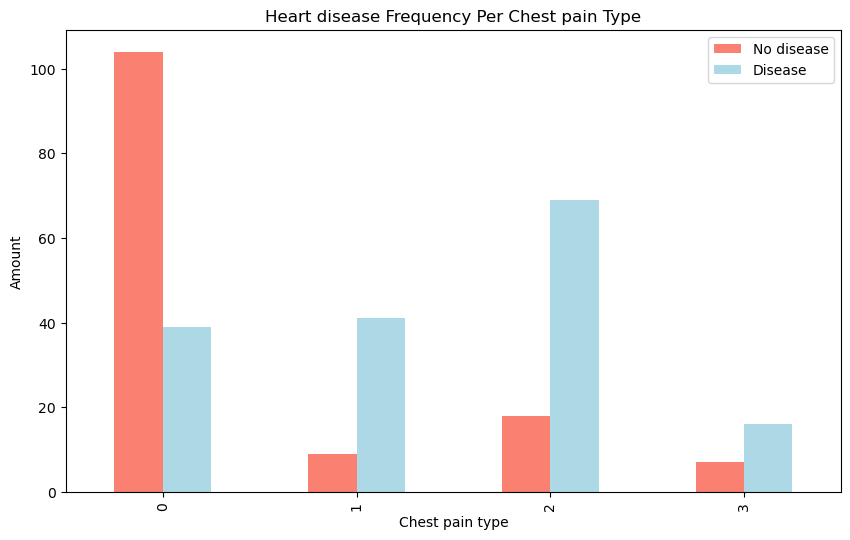

In [18]:
# make the crosstab more visual 

pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10,6),
                                   color = ['salmon', "lightblue"])

# Add some communication

plt.title('Heart disease Frequency Per Chest pain Type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend({'No disease','Disease'});

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a coreelation matrix

df.corr()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


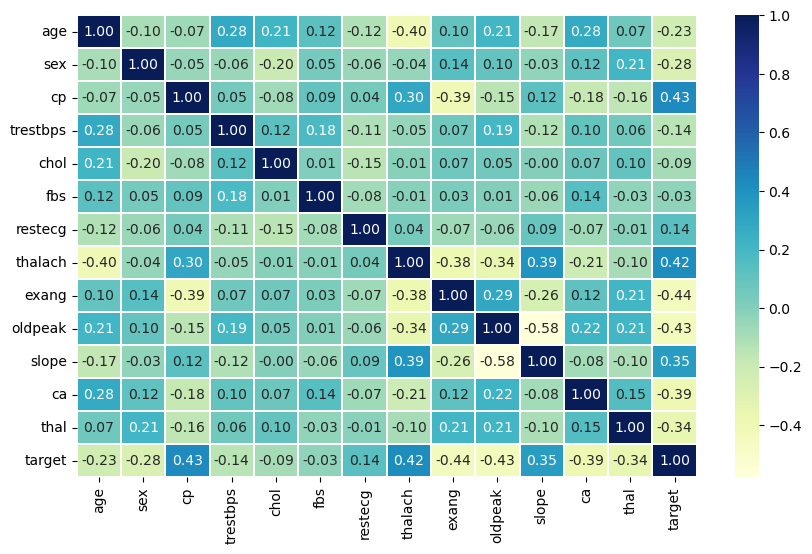

In [21]:
# Let's make our correlation matrix more visual 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (10,6))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.1,
                 fmt = ".2f",
                 cmap = "YlGnBu");

## 5. Modelling

In [22]:
# We are working on a classification model 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split into X & y data 

X = df.drop('target', axis = 1)
y = df['target']



In [24]:
# Spit data into and test  

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)



Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the pattern) on the training set .

and we'll test it(use the pattern)

WE're going to try 3 different machine machine learning models 

1. Logistic Regression
2. Kn neighbours
3. RandomForestClassifier 



In [25]:
# Put our models in a dict 

models = {'Logistic Regression': LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and to score models

def fit_and_score(models, X_train,X_test, y_train,y_test):
    """
        Fits and evaluate the given machine learning models.
        models : a dict of sklearn machine learning
        X_train : training data (no labels)
        X_test : testing data (no labels)
        y_train : training labels 
        y_test : testing labels
    """
    # Setup the random seed
    
    np.random.seed(42)
    # Make a dictionary to keep model scores
    
    model_scores = {}
    
    # Loop through models
    
    for model_name, model in models.items():
        
        # fit each model to data set
        
        print(f'Fitting the model {model_name}...')
        model.fit(X_train, y_train)
        
        # Evaluate each model
        print(f'Socring the model {model_name}...')

        model_scores[model_name] = model.score(X_test, y_test)
        
    return model_scores



In [26]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

Fitting the model Logistic Regression...
Socring the model Logistic Regression...
Fitting the model KNN...
Socring the model KNN...
Fitting the model Random Forest...


Socring the model Random Forest...


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

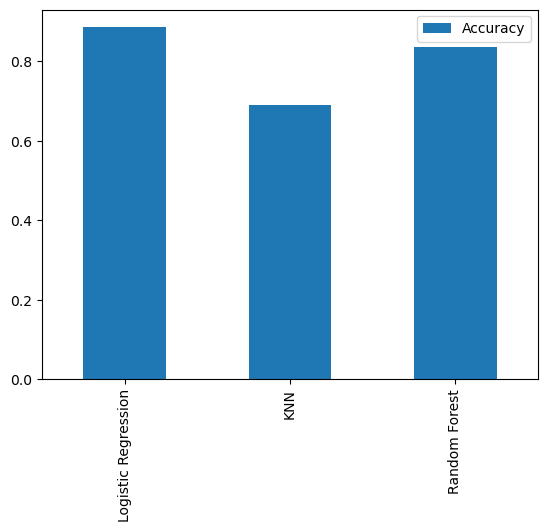

In [27]:
### Model Comparison

model_compare = pd.DataFrame(model_scores,
                             index = ['Accuracy'])
model_compare.T.plot.bar();

No we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do ?

Let's look at the following:
* Hyperparameter tuning 
* Feature importance 
* Confusion matrix
* Cross_validation
* Precision
* Recall
* Accuracy
* Classification report 
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# Setup KNN instances

knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the best scores list 
    test_scores.append(knn.score(X_test, y_test))    



Maximum Knn score on the test data: 75.41%


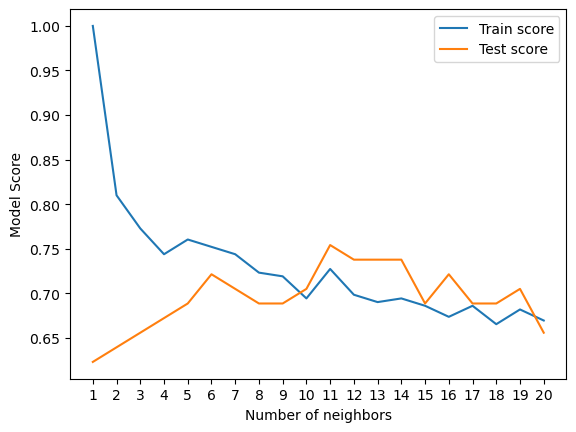

In [29]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum Knn score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune : 

* LogisticRegression()
* RandomForestClassifier()

... Using RandomizedSearchCV

In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameterss grids setup for each of our models, let's tune themn using RandomizedSearchCV

In [31]:
# Tune logistic regression 

np.random.seed(42)

# Setup random hyperperparameter fro logistic regression 

rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 n_iter=20,
                                 verbose = True)

# Fit randiom parameter search model for logistic regression

rs_log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_grid.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression, Let's do the same for RandomForestClassifier

In [34]:
# Setup the random seed

np.random.seed(42)

# Setup rqndom hyperparameter search for RandomClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv =5,
                           n_iter=20,
                           verbose= True)


# Foit the random hyperparameter search model for randomforestclassifier

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Find the best parameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:

# Evaluate the randomiwed search RandomForestClassifer

rs_rf.score(X_test, y_test)

0.8688524590163934

1. By hand 
2. RandomizedSearchCV
3. GridSearchCV


## Hyperparameter tuning with gridsearch  cv 

Since our logisticregression model provides the best scores so far, we'll try to improve them again using GridSearchCV


In [37]:
# Different hyperparameter fro our logistic regression model 

log_reg_grid = {"C" : np.logspace(-4,4, 30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for logistic regression 

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv= 5,
                          verbose = True
                          )

# Fit grid hyperparameter search model

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
# Chec k the best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# Evaluate the search LogisticRegression model

gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
# Compare the grid search vs the randomized search 

gs_log_reg.score(X_test, y_test) == rs_log_grid.score(X_test, y_test)

True

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* COnfusion matrix
* Classification report
* Precision
* Recall 
* F1-Score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained modelm first we need to make predictions

In [42]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

<Figure size 800x600 with 0 Axes>

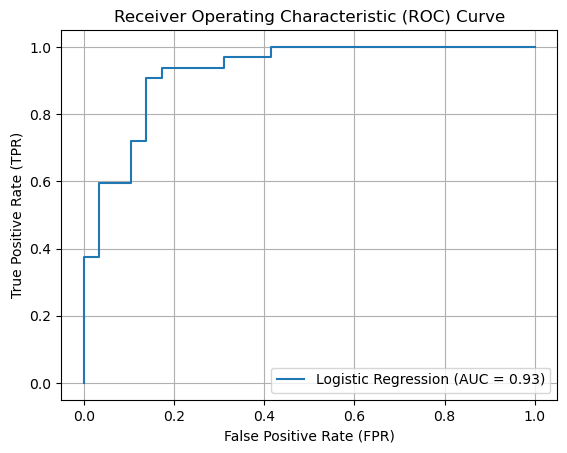

AUC Score: 0.925646551724138


In [47]:
# Plot Roc curve and calclulate auc metric

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

# Assuming gs_log_reg is your trained logistic regression model

# Predict probabilities for positive class (class 1)
y_prob = gs_log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Logistic Regression')
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)

In [48]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


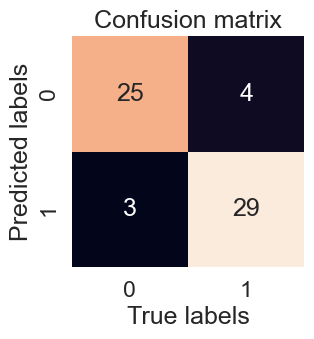

In [56]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking coonfusion matrix
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax  = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar= False)
    ax.set(title='Confusion matrix',
           xlabel = 'True labels',
           ylabel = 'Predicted labels')
    
plot_conf_mat(y_test, y_preds)

Now we'vr got an roc curve and a confusion matrix, let's get a classification report as well as cross-validatedprecision, recall and f1 score

In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross valiodation 

We're going to calculate precision, recall and f1 score of our model using cross validation and to do sowe'll  cross_val_score()

In [58]:
# Check best hyperparameters 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best parameters 

model = LogisticRegression(C = 0.20433597178569418,
                           solver = 'liblinear')



In [71]:
# Cross-validated accuracy

cv_acc = cross_val_score(model,
                         X,
                         y,
                         scoring = 'accuracy')

cv_acc.mean()

0.8446994535519124

In [76]:
# Cross validated precision

cv_precision = cross_val_score(model,
                        X,
                        y,
                        scoring='precision')

cv_precision.mean()

0.8207936507936507

In [77]:
# Cross validated f1 score 

cv_f1 = cross_val_score(model,
                        X,
                        y, 
                        scoring='f1')

cv_f1.mean()

0.8673007976269721

In [80]:
# Corss validated recall

cv_recall = cross_val_score(model,
                        X,
                        y,
                        scoring='recall')

cv_recall.mean()

0.9212121212121213

In [87]:
 # Visualize cross_validated metrics
 
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'precision': cv_precision,
                           'f1_score' : cv_f1,
                           'recall' : cv_recall},
                         )

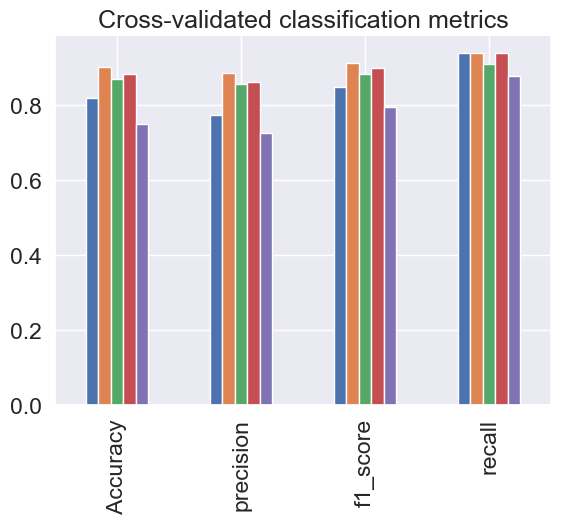

In [ ]:
cv_metrics.T.plot.bar(title= 'Cross-validated classification metrics',
                    legend = False);

### Feature Importance 

Feature importance is another as asking, "Wich features contributed most to outcomes of the model and how did they contribute ?"

Finding feature importance is different for rach machine learning model 



Let's find the feature importance for our logistic regression model....

In [94]:
# Fit an instance of Logistic regression 

gs_log_reg.best_params_

model = LogisticRegression(C = 0.20433597178569418,
                           solver= 'liblinear')

model.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [95]:
model.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [97]:
# Match the coef's of features to columns 

feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict


{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [ ]:
# Match the coef's of features to columns 

feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict


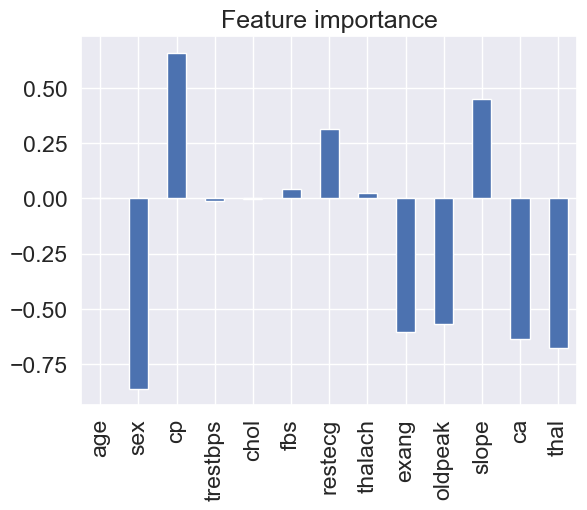

In [109]:
features_df = pd.DataFrame(feature_dict, index=[0])
features_df.T.plot.bar(title='Feature importance',
                       legend = False);

In [110]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


slope - the slope of the peak exercise ST segment

    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

In [112]:
pd.crosstab(df['slope'],df['target'])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107
